latent 8
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.53      0.53      2498
       Relay       0.46      0.46      0.46      2166

    accuracy                           0.50      4664
   macro avg       0.50      0.50      0.50      4664
weighted avg       0.50      0.50      0.50      4664



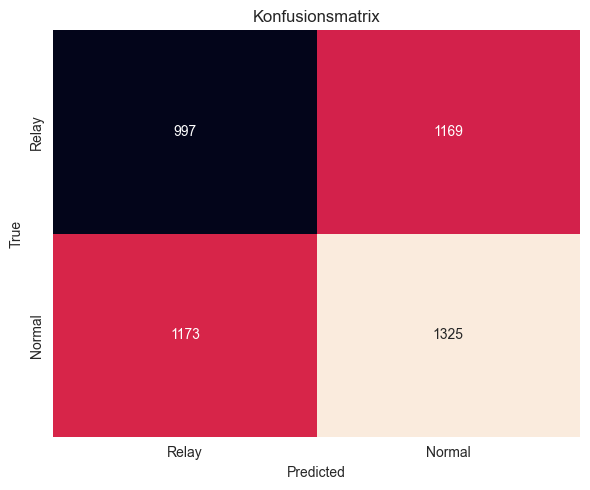

latent 8
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.54      0.54      2498
       Relay       0.47      0.47      0.47      2166

    accuracy                           0.51      4664
   macro avg       0.51      0.51      0.51      4664
weighted avg       0.51      0.51      0.51      4664



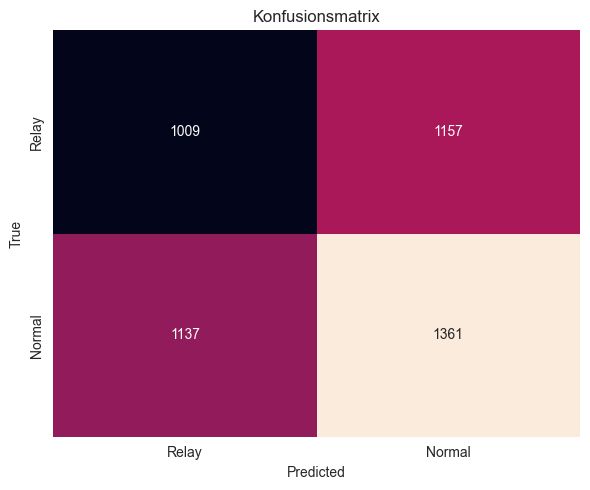

latent 8
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.55      0.55      2498
       Relay       0.48      0.47      0.47      2166

    accuracy                           0.51      4664
   macro avg       0.51      0.51      0.51      4664
weighted avg       0.51      0.51      0.51      4664



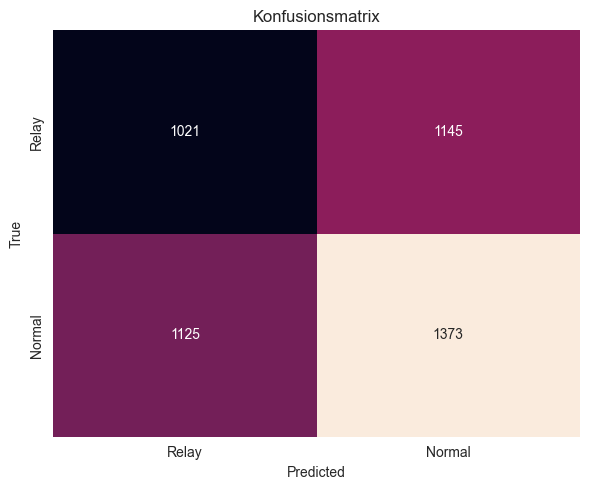

latent 2
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.55      0.55      2498
       Relay       0.48      0.48      0.48      2166

    accuracy                           0.51      4664
   macro avg       0.51      0.51      0.51      4664
weighted avg       0.51      0.51      0.51      4664



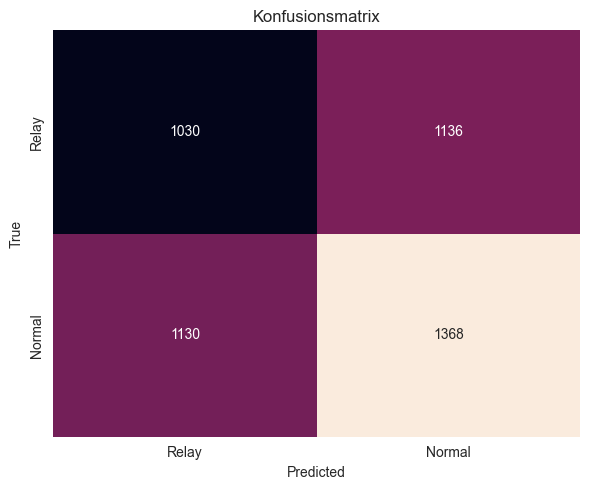

latent 2
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.53      0.53      2498
       Relay       0.46      0.47      0.46      2166

    accuracy                           0.50      4664
   macro avg       0.50      0.50      0.50      4664
weighted avg       0.50      0.50      0.50      4664



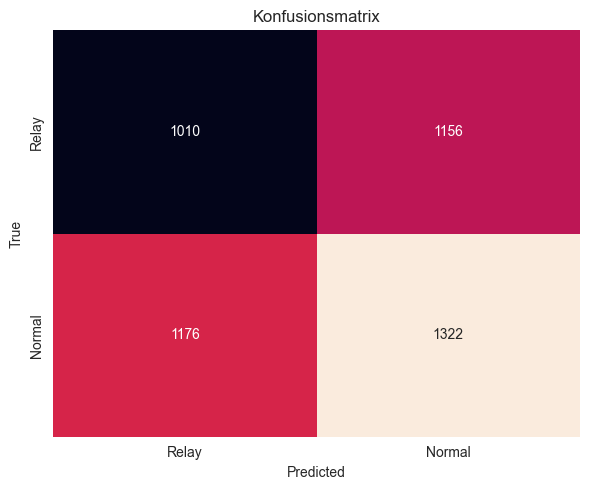

latent 2
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.52      0.52      2498
       Relay       0.46      0.46      0.46      2166

    accuracy                           0.49      4664
   macro avg       0.49      0.49      0.49      4664
weighted avg       0.49      0.49      0.49      4664



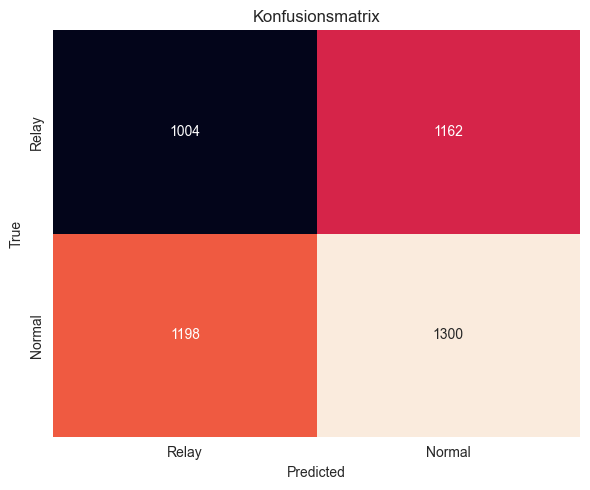

latent 32
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.52      0.53      2498
       Relay       0.46      0.48      0.47      2166

    accuracy                           0.50      4664
   macro avg       0.50      0.50      0.50      4664
weighted avg       0.50      0.50      0.50      4664



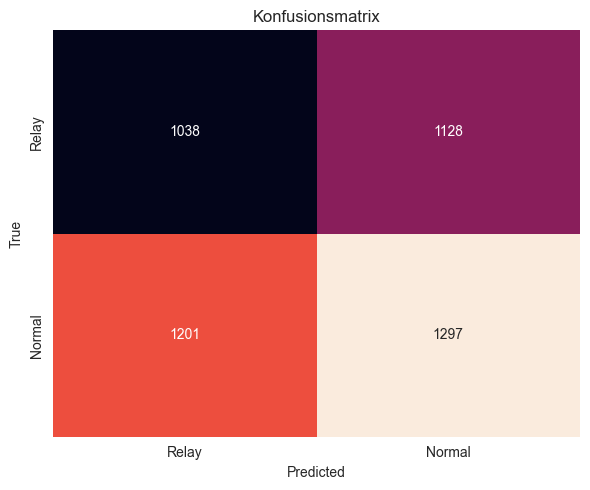

latent 32
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.54      0.54      2498
       Relay       0.46      0.46      0.46      2166

    accuracy                           0.50      4664
   macro avg       0.50      0.50      0.50      4664
weighted avg       0.50      0.50      0.50      4664



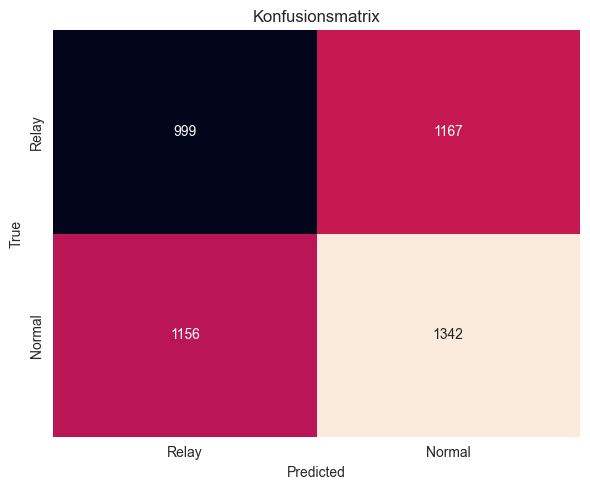

latent 32
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.53      0.54      2498
       Relay       0.47      0.47      0.47      2166

    accuracy                           0.51      4664
   macro avg       0.50      0.50      0.50      4664
weighted avg       0.51      0.51      0.51      4664



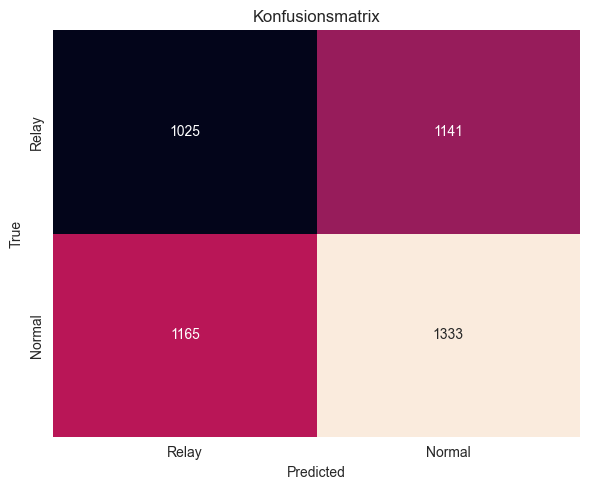

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.alad import ALAD

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for l in {2, 8, 32}:
    for d in {0.1, 0.2, 0.3}:
        clf = ALAD(contamination=len(X_test_relay)/len(X_test_combined), latent_dim=l, dropout_rate=d, enc_layers=(100, 50, 25), dec_layers=(25, 50, 100))
        clf.fit(X_train_scaled)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"latent {l}")
        print(f"dropout {d}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()

latent 8
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.54      0.52      2498
       Relay       0.43      0.41      0.42      2166

    accuracy                           0.48      4664
   macro avg       0.47      0.47      0.47      4664
weighted avg       0.47      0.48      0.48      4664



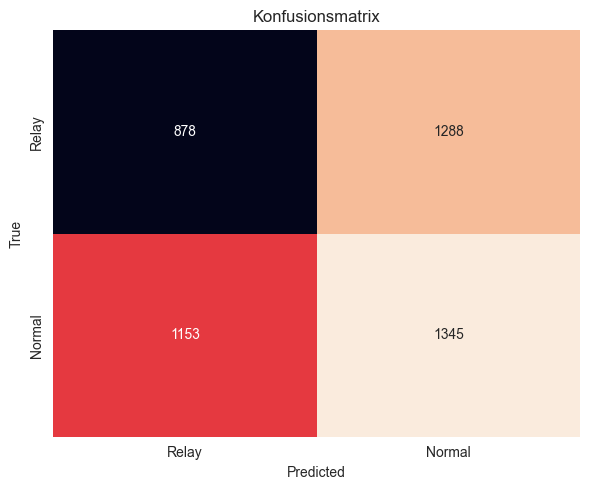

latent 8
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.54      0.54      2498
       Relay       0.46      0.46      0.46      2166

    accuracy                           0.50      4664
   macro avg       0.50      0.50      0.50      4664
weighted avg       0.50      0.50      0.50      4664



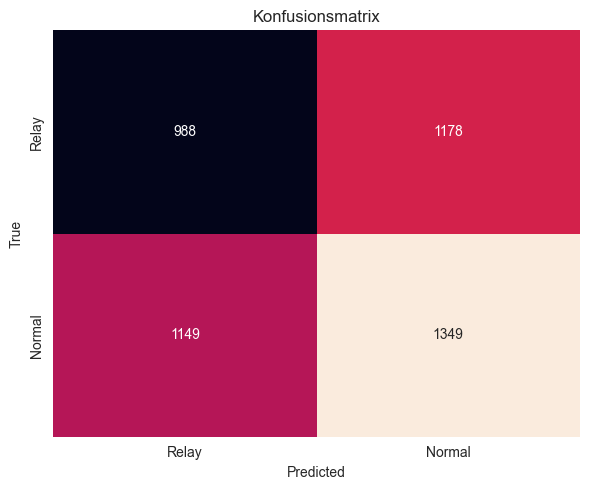

latent 8
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.54      0.54      2498
       Relay       0.46      0.45      0.46      2166

    accuracy                           0.50      4664
   macro avg       0.50      0.50      0.50      4664
weighted avg       0.50      0.50      0.50      4664



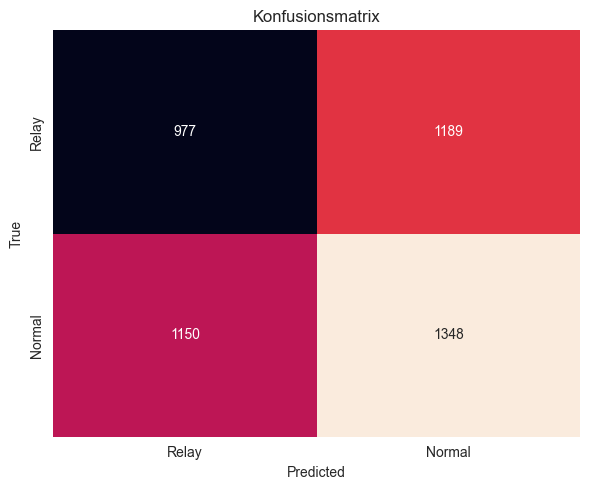

latent 2
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.53      0.52      2498
       Relay       0.43      0.41      0.42      2166

    accuracy                           0.47      4664
   macro avg       0.47      0.47      0.47      4664
weighted avg       0.47      0.47      0.47      4664



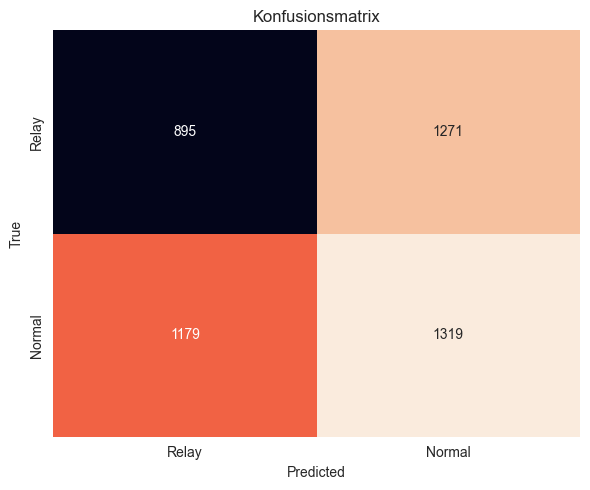

latent 2
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.53      0.53      2498
       Relay       0.46      0.47      0.46      2166

    accuracy                           0.50      4664
   macro avg       0.50      0.50      0.50      4664
weighted avg       0.50      0.50      0.50      4664



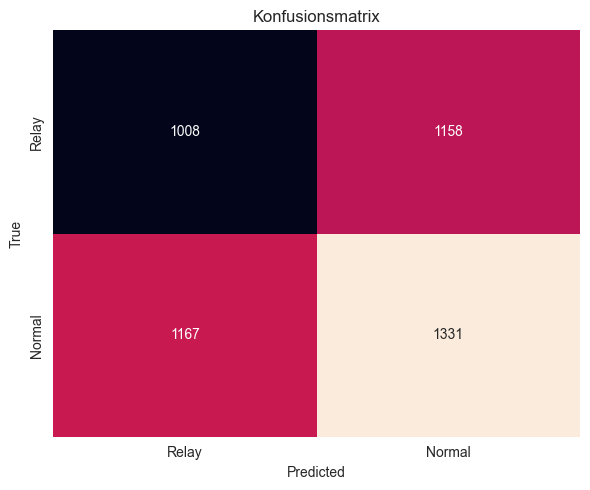

latent 2
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.53      0.53      2498
       Relay       0.45      0.45      0.45      2166

    accuracy                           0.49      4664
   macro avg       0.49      0.49      0.49      4664
weighted avg       0.49      0.49      0.49      4664



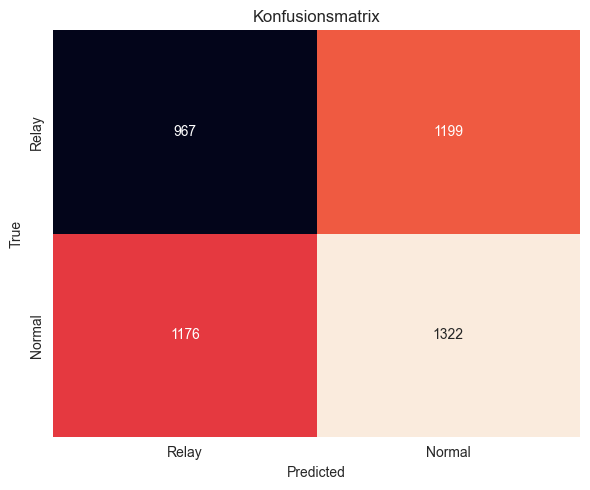

latent 32
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.53      0.52      2498
       Relay       0.44      0.42      0.43      2166

    accuracy                           0.48      4664
   macro avg       0.48      0.48      0.47      4664
weighted avg       0.48      0.48      0.48      4664



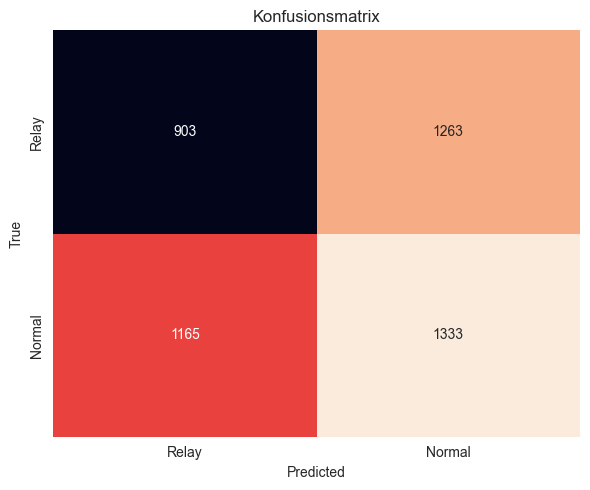

latent 32
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.53      0.52      2498
       Relay       0.45      0.43      0.44      2166

    accuracy                           0.49      4664
   macro avg       0.48      0.48      0.48      4664
weighted avg       0.49      0.49      0.49      4664



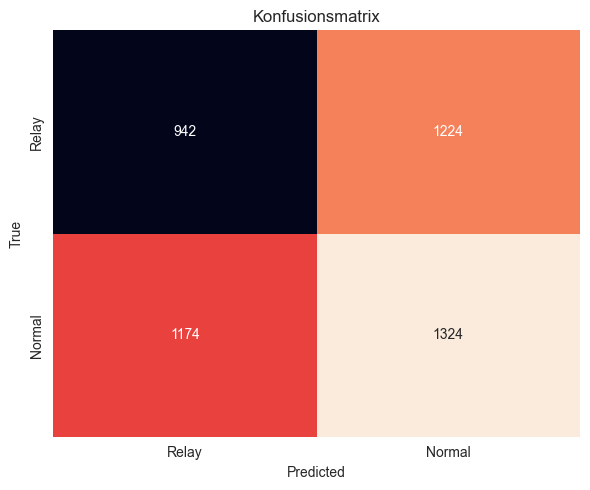

latent 32
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.54      0.54      2498
       Relay       0.46      0.45      0.45      2166

    accuracy                           0.50      4664
   macro avg       0.49      0.49      0.49      4664
weighted avg       0.50      0.50      0.50      4664



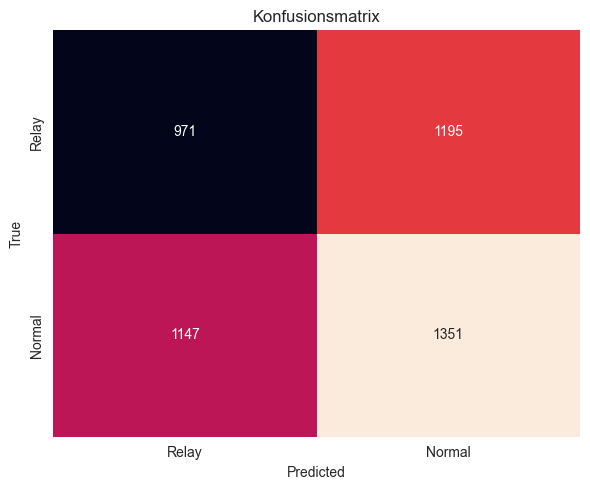

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.alad import ALAD

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for l in {2, 8, 32}:
    for d in {0.1, 0.2, 0.3}:
        clf = ALAD(contamination=len(X_test_relay)/len(X_test_combined), latent_dim=l, dropout_rate=d, enc_layers=(100, 50, 25), dec_layers=(25, 50, 100))
        clf.fit(X_train_scaled)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"latent {l}")
        print(f"dropout {d}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()

latent 8
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.56      0.01      0.03      2166

    accuracy                           0.54      4664
   macro avg       0.55      0.50      0.36      4664
weighted avg       0.55      0.54      0.39      4664



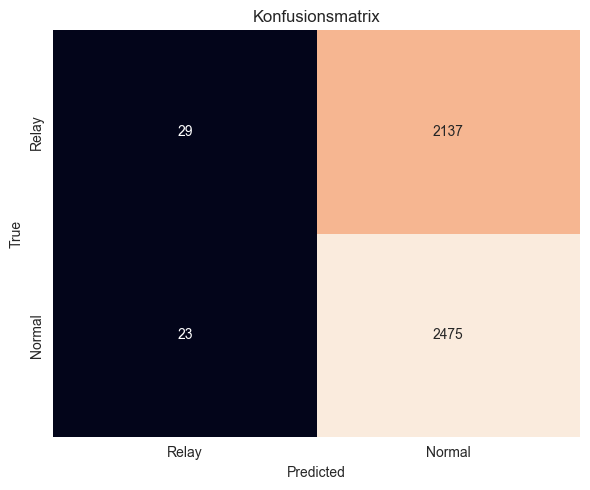

latent 8
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.48      0.01      0.02      2166

    accuracy                           0.54      4664
   macro avg       0.51      0.50      0.36      4664
weighted avg       0.51      0.54      0.38      4664



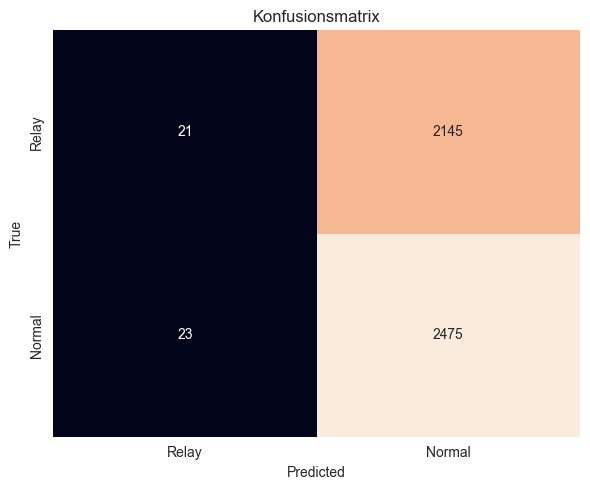

latent 8
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2498
       Relay       0.36      0.01      0.02      2166

    accuracy                           0.53      4664
   macro avg       0.45      0.50      0.36      4664
weighted avg       0.46      0.53      0.38      4664



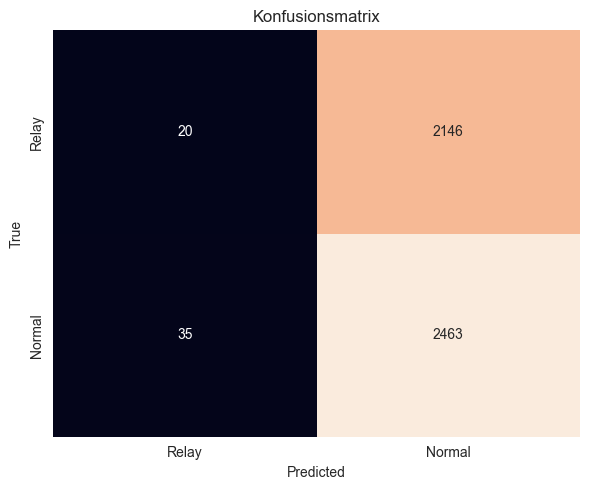

latent 2
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2498
       Relay       0.37      0.01      0.02      2166

    accuracy                           0.53      4664
   macro avg       0.45      0.50      0.35      4664
weighted avg       0.46      0.53      0.38      4664



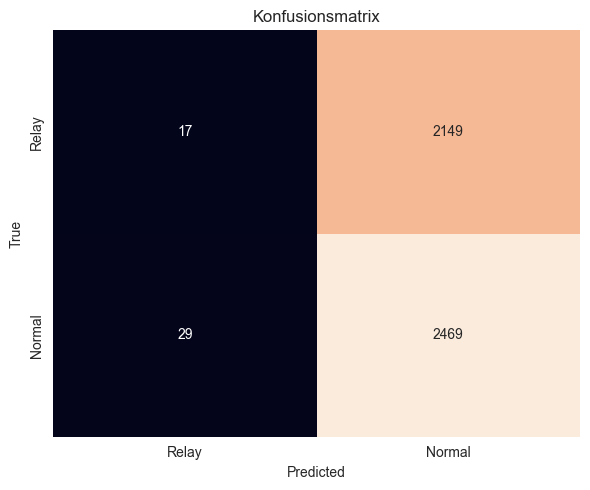

latent 2
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.51      0.01      0.02      2166

    accuracy                           0.54      4664
   macro avg       0.52      0.50      0.36      4664
weighted avg       0.52      0.54      0.38      4664



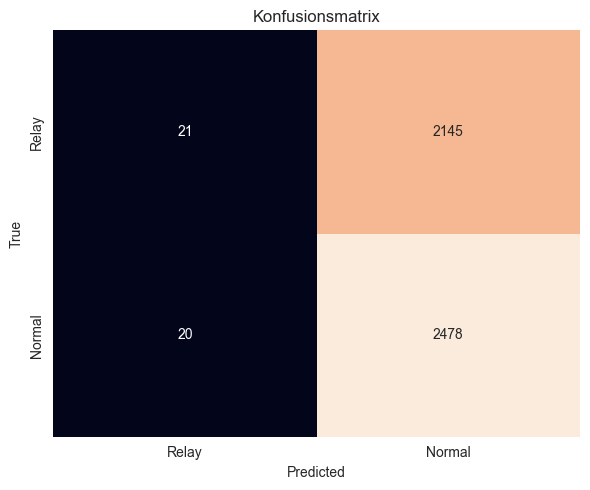

latent 2
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.42      0.01      0.01      2166

    accuracy                           0.53      4664
   macro avg       0.48      0.50      0.35      4664
weighted avg       0.48      0.53      0.38      4664



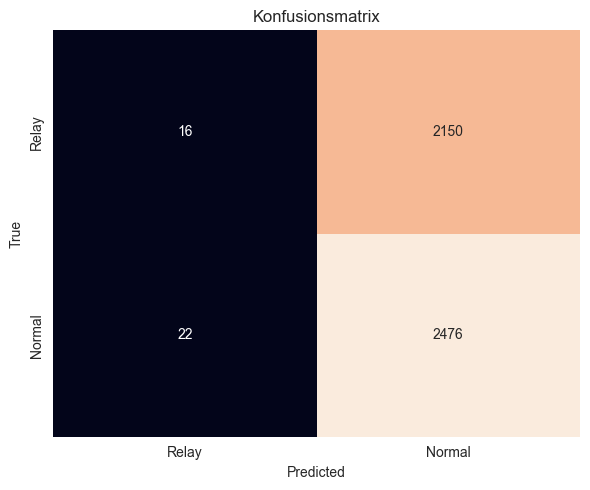

latent 32
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2498
       Relay       0.38      0.01      0.01      2166

    accuracy                           0.53      4664
   macro avg       0.46      0.50      0.35      4664
weighted avg       0.47      0.53      0.38      4664



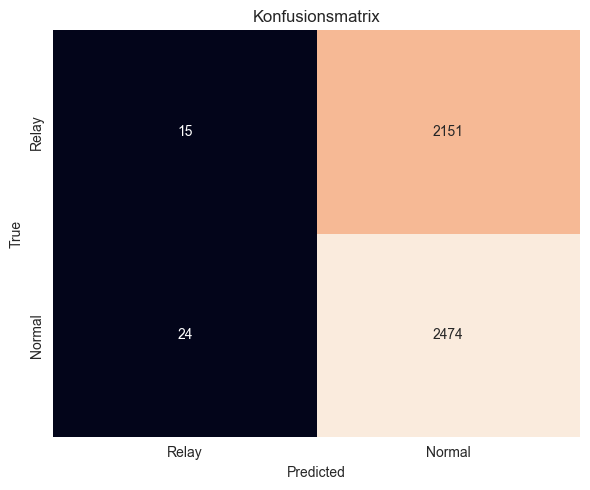

latent 32
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.47      0.01      0.02      2166

    accuracy                           0.53      4664
   macro avg       0.50      0.50      0.36      4664
weighted avg       0.50      0.53      0.38      4664



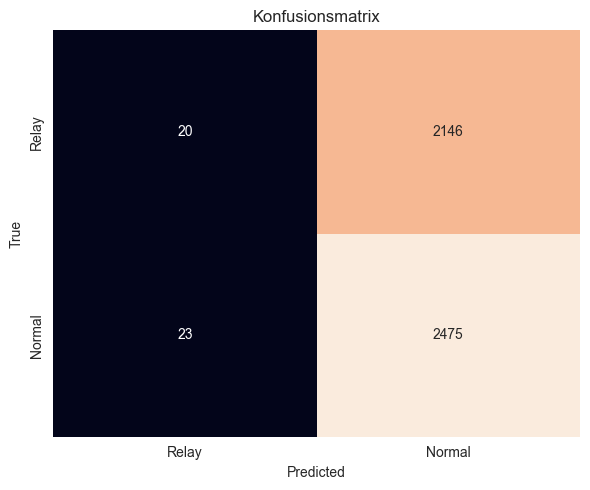

latent 32
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.53      0.01      0.02      2166

    accuracy                           0.54      4664
   macro avg       0.53      0.50      0.36      4664
weighted avg       0.53      0.54      0.38      4664



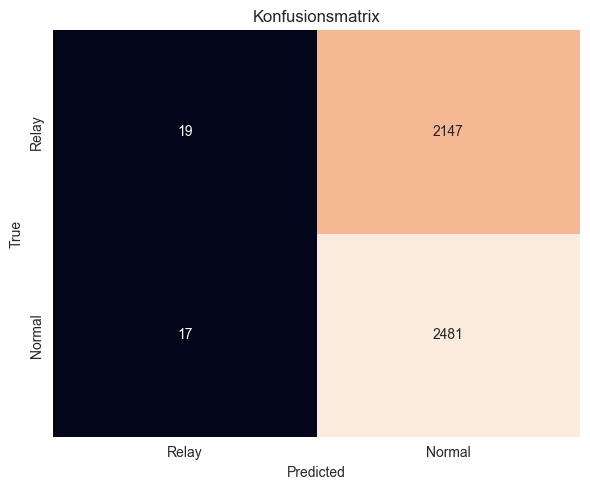

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.alad import ALAD

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for l in {2, 8, 32}:
    for d in {0.1, 0.2, 0.3}:
        clf = ALAD(contamination=0.01, latent_dim=l, dropout_rate=d, enc_layers=(100, 50, 25), dec_layers=(25, 50, 100))
        clf.fit(X_train_scaled)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"latent {l}")
        print(f"dropout {d}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()

latent 8
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.49      0.01      0.02      2166

    accuracy                           0.54      4664
   macro avg       0.51      0.50      0.36      4664
weighted avg       0.51      0.54      0.38      4664



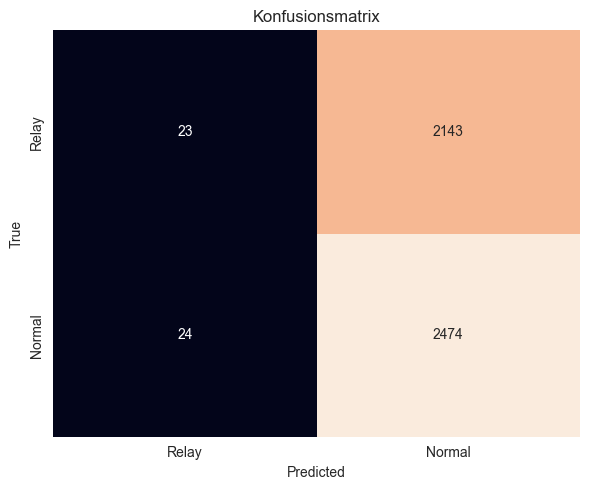

latent 8
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2498
       Relay       0.33      0.01      0.01      2166

    accuracy                           0.53      4664
   macro avg       0.43      0.50      0.35      4664
weighted avg       0.44      0.53      0.38      4664



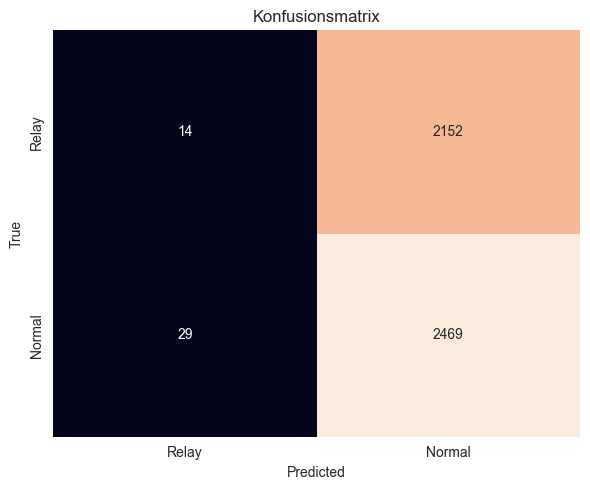

latent 8
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2498
       Relay       0.28      0.00      0.01      2166

    accuracy                           0.53      4664
   macro avg       0.41      0.50      0.35      4664
weighted avg       0.42      0.53      0.38      4664



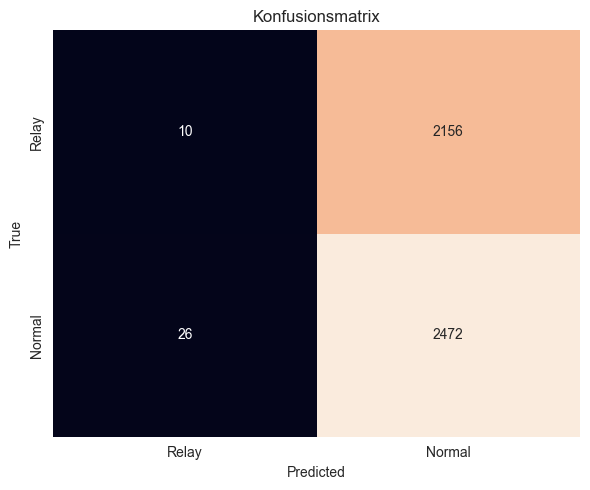

latent 2
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.45      0.01      0.02      2166

    accuracy                           0.53      4664
   macro avg       0.49      0.50      0.36      4664
weighted avg       0.49      0.53      0.38      4664



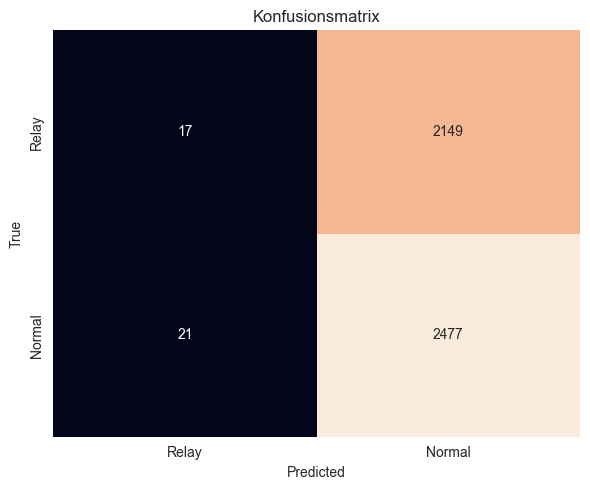

latent 2
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2498
       Relay       0.35      0.01      0.01      2166

    accuracy                           0.53      4664
   macro avg       0.44      0.50      0.35      4664
weighted avg       0.45      0.53      0.38      4664



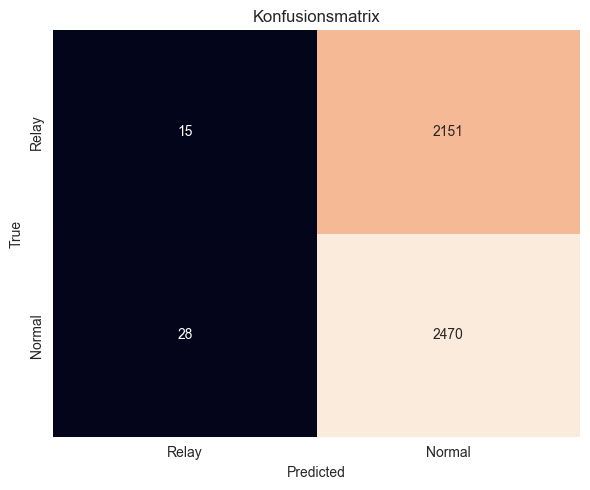

latent 2
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.42      0.01      0.01      2166

    accuracy                           0.53      4664
   macro avg       0.48      0.50      0.35      4664
weighted avg       0.48      0.53      0.38      4664



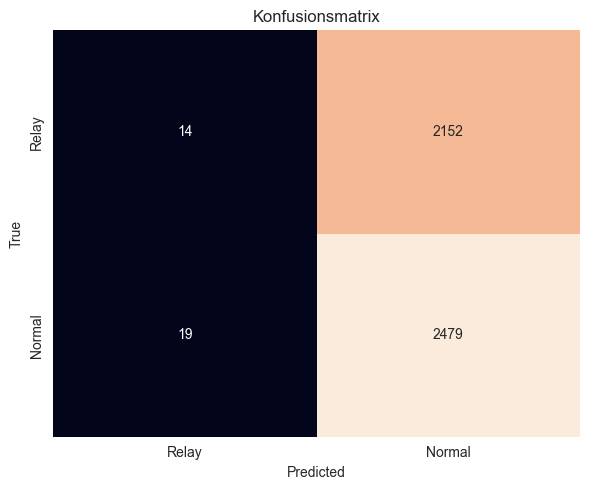

latent 32
dropout 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.57      0.02      0.03      2166

    accuracy                           0.54      4664
   macro avg       0.55      0.50      0.36      4664
weighted avg       0.55      0.54      0.39      4664



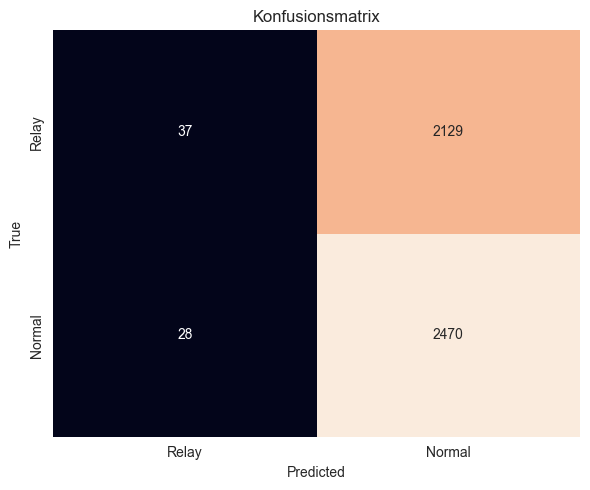

latent 32
dropout 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.48      0.01      0.01      2166

    accuracy                           0.54      4664
   macro avg       0.51      0.50      0.36      4664
weighted avg       0.51      0.54      0.38      4664



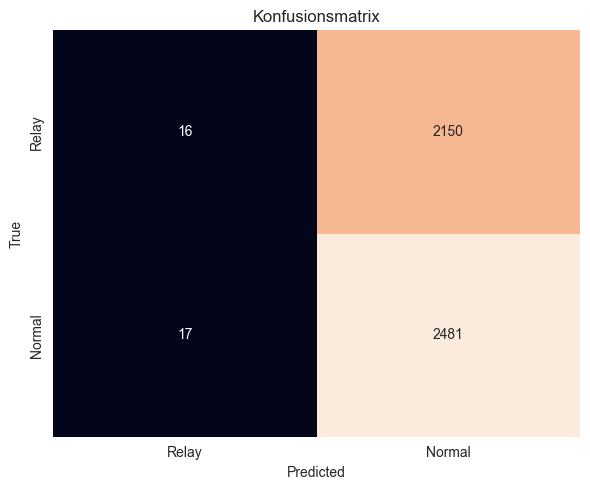

latent 32
dropout 0.3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2498
       Relay       0.31      0.01      0.01      2166

    accuracy                           0.53      4664
   macro avg       0.42      0.50      0.35      4664
weighted avg       0.43      0.53      0.38      4664



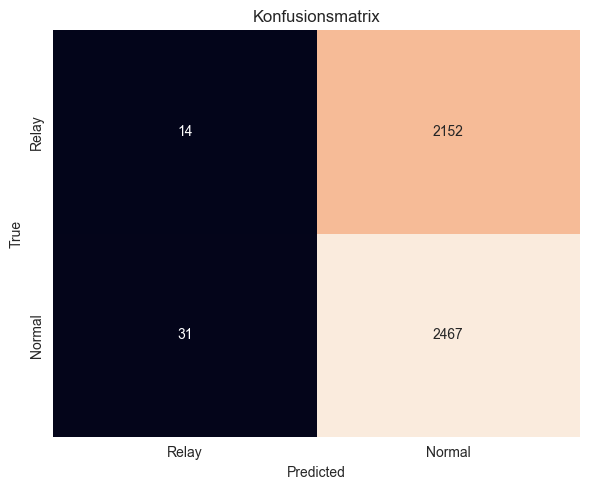

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.alad import ALAD

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for l in {2, 8, 32}:
    for d in {0.1, 0.2, 0.3}:
        clf = ALAD(contamination=0.01, latent_dim=l, dropout_rate=d, enc_layers=(100, 50, 25), dec_layers=(25, 50, 100))
        clf.fit(X_train_scaled)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"latent {l}")
        print(f"dropout {d}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()